In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn. linear_model import LinearRegression

import warnings
warnings . filterwarnings('ignore')

### Loading & Transforming the Dataset

In [2]:
# Read the CSV file 'gold_prices_over_time.csv' into a DataFrame
df=pd.read_csv('gold_prices_over_time.csv') 

# Display the first 5 rows of the DataFrame
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
# Get the shape of the DataFrame 'df'
df.shape

(847, 2)

In [4]:
# Print the date range of gold prices available in the DataFrame 'df'
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [5]:
# Create a date range from '1/1/1950' to '8/1/2020' with a monthly frequency
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [6]:
# Drop the 'Date' column from the DataFrame
df.drop('Date', axis=1, inplace=True)

# Add a new column 'Date' to the DataFrame 'df' with the values from the 'date' variable
df['Date'] = date

# Set the 'Date' column (newly created) as the index of the DataFrame
df = df.set_index('Date')

# Display the first 5 rows of the DataFrame
df.head()

,Price
Date,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


----------------

### Exploratory Data Analysis (EDA)

#### Monthly Gold Price since 1950

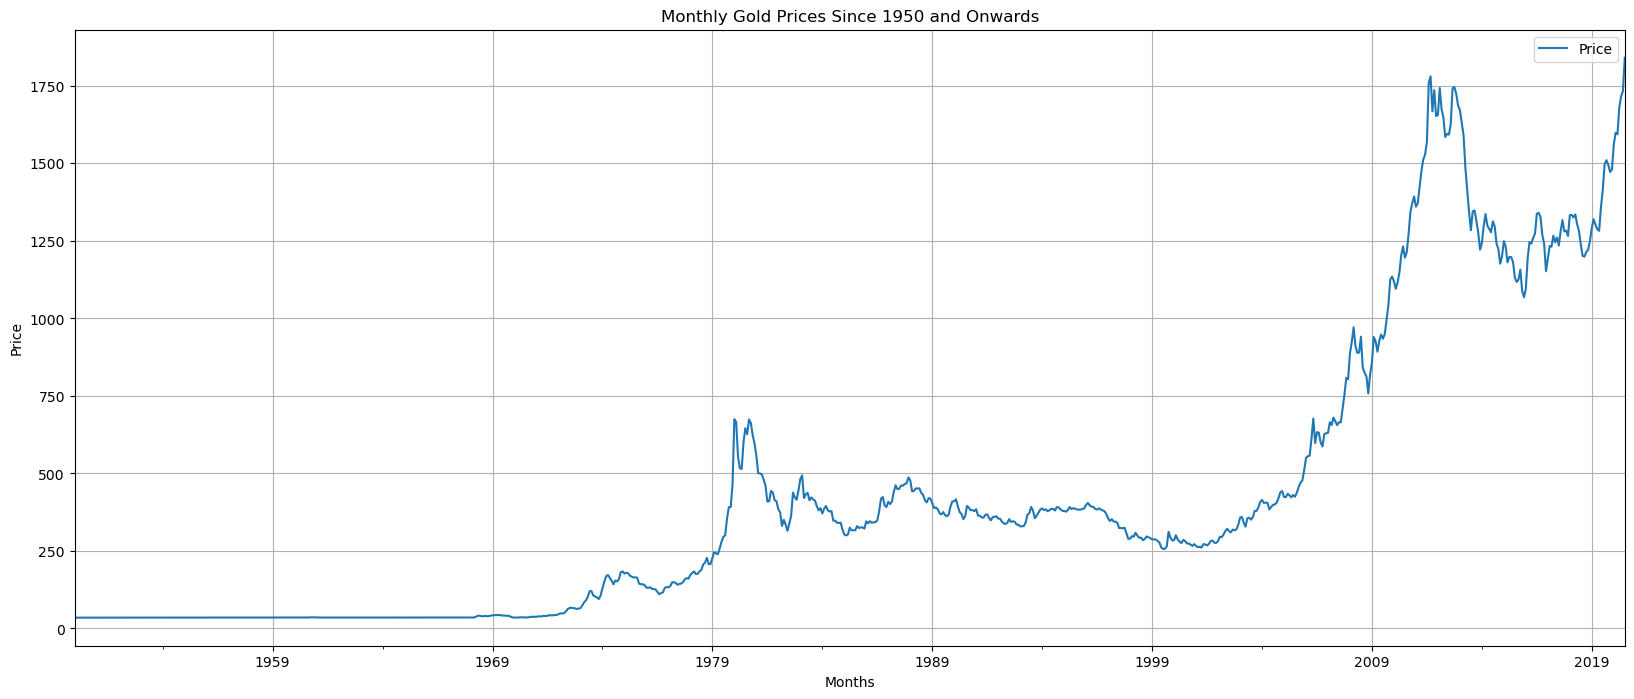

In [7]:
# Plot the data in the DataFrame 'df' using the 'plot' method
df.plot(figsize=(20,8))

# Set the title of the plot
plt.title('Monthly Gold Prices Since 1950 and Onwards')

# Set the label for the x-axis
plt.xlabel('Months')

# Set the label for the y-axis
plt.ylabel('Price')

# Add a grid to the plot
plt.grid();

#### Descriptive Stats

In [8]:
# Generating descriptive statistics of the DataFrame 'df' and rounding off the statistics to 2 decimal places
round(df.describe(),2)

,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


#### Box Plot - Yearly Gold Prices

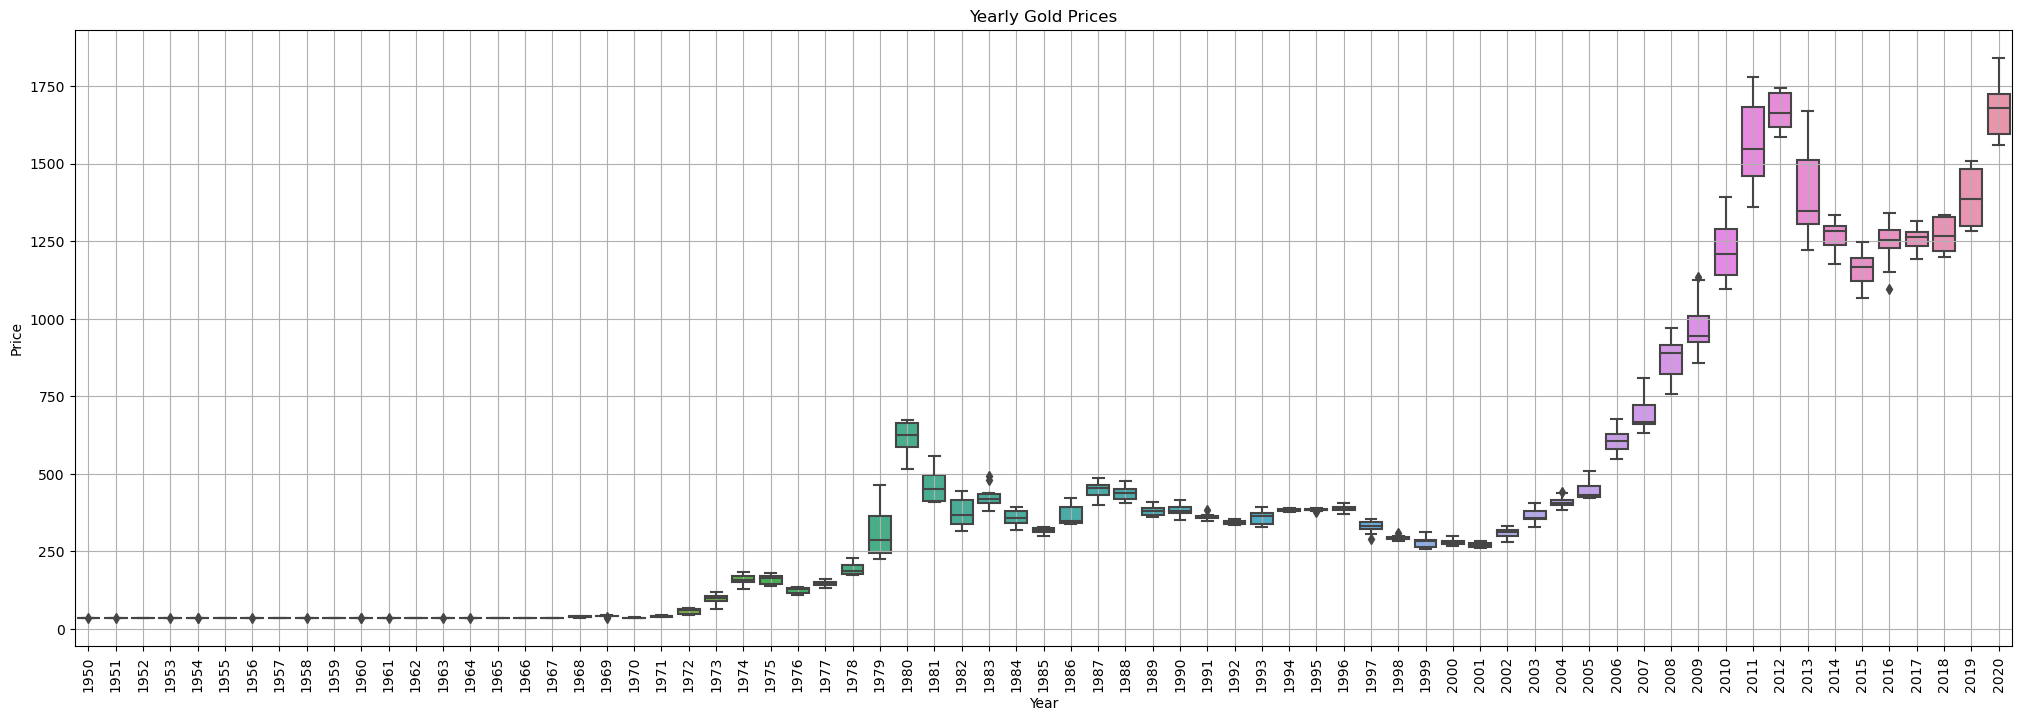

In [9]:
# Create a new figure and axes with the specified size
_, ax = plt.subplots(figsize=(25,8))

# Create a boxplot of the data in the DataFrame 'df'
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)

# Set the title of the plot
plt.title('Yearly Gold Prices')

# Set the label for the x-axis
plt.xlabel('Year')

# Set the label for the y-axis
plt.ylabel('Price')

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Add a grid to the plot
plt.grid()

#### Line Chart - Gold Prices based on Months

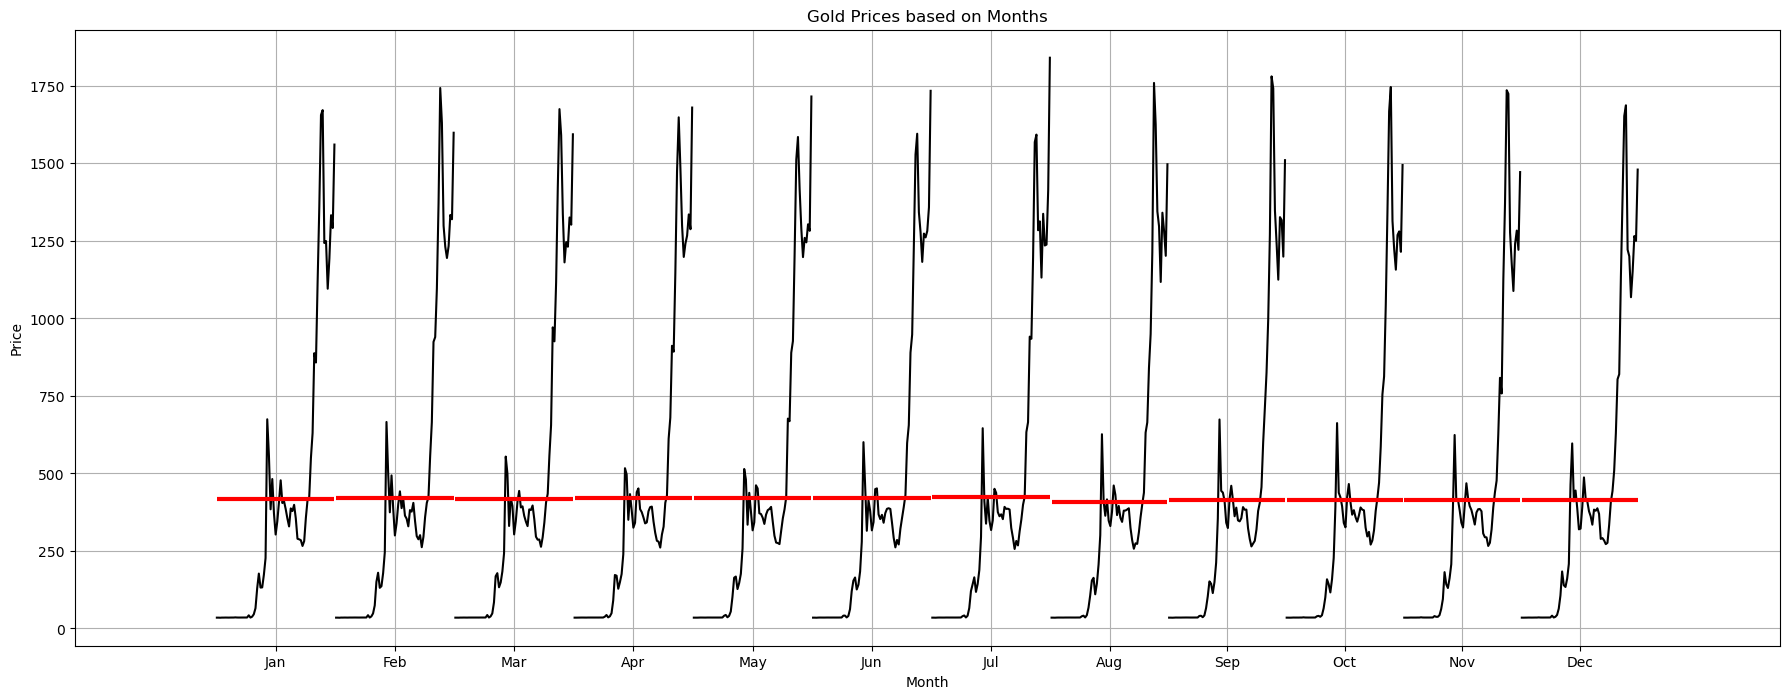

In [10]:
# Import the month_plot function from the statsmodels.graphics.tsaplots module
from statsmodels.graphics.tsaplots import month_plot

# Create a new figure and axes with the specified size
fig, ax = plt.subplots(figsize=(22,8))

# Create a month plot of the data in the DataFrame 'df'
month_plot(df, ylabel='Gold Price', ax=ax)

# Set the title of the plot
plt.title('Gold Prices based on Months')

# Set the label for the x-axis
plt.xlabel('Month')

# Set the label for the y-axis
plt.ylabel('Price')

# Add a grid to the plot
plt.grid();

#### Box Plot - Gold Prices based on Months

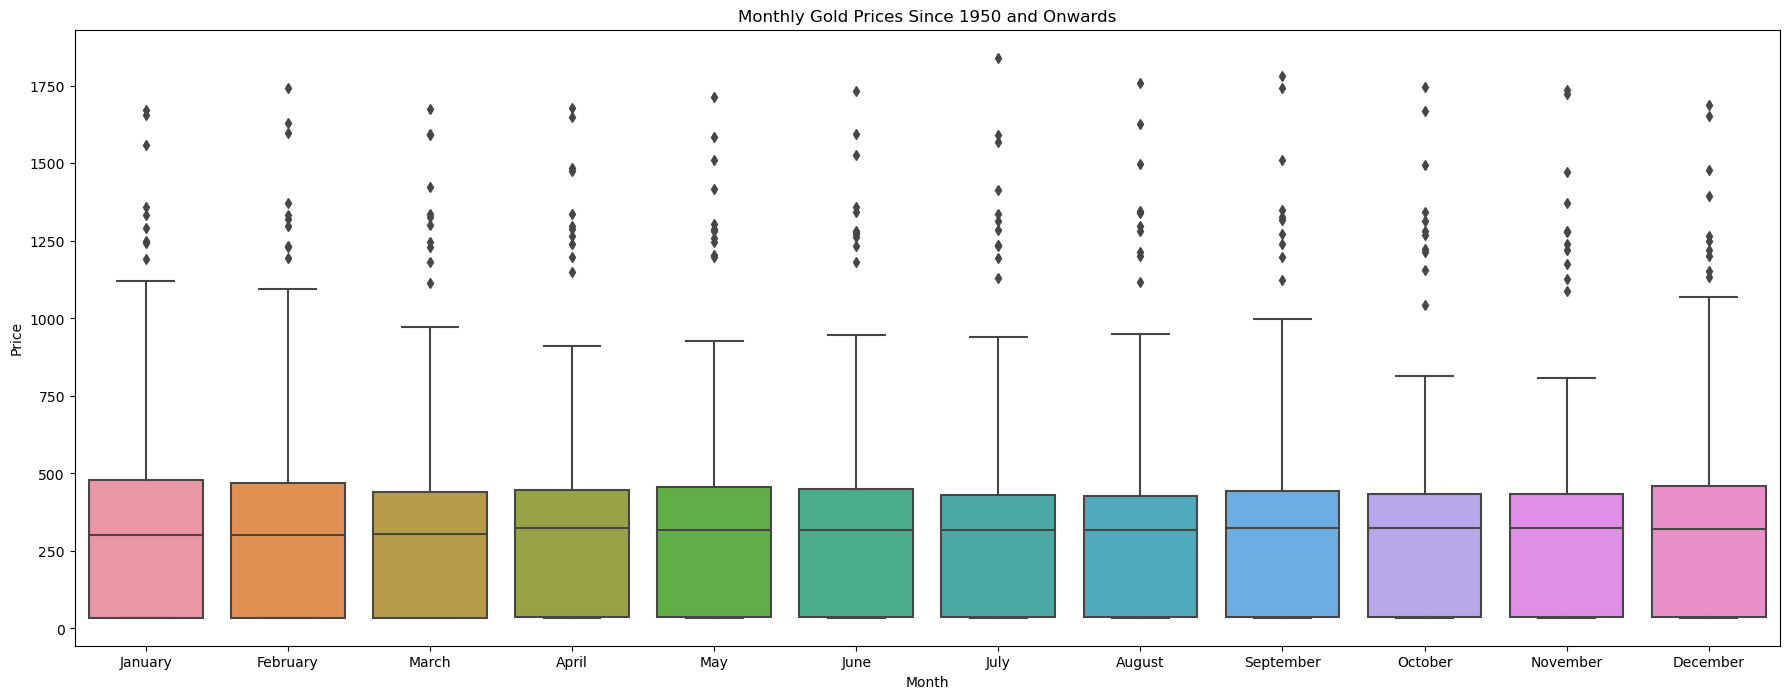

In [11]:
# Create a new figure and axes with the specified size
_, ax = plt.subplots(figsize=(22,8))

# Create a boxplot of the data in the DataFrame 'df'
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)

# Set the title of the plot
plt.title('Monthly Gold Prices Since 1950 and Onwards')

# Set the label for the x-axis
plt.xlabel('Month')

# Set the label for the y-axis
plt.ylabel('Price')

# Display the plot
plt.show()

#### Average Gold Prices Trend since 1950

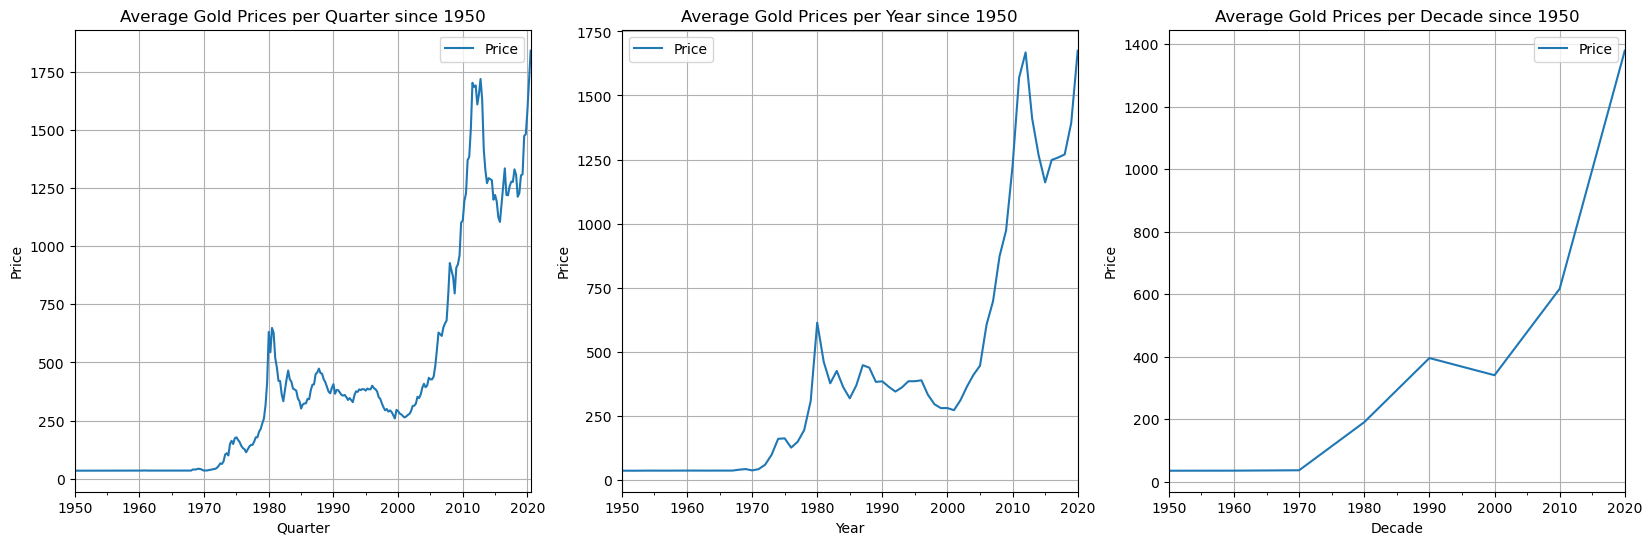

In [12]:
# Create a new figure with 3 subplots arranged in a 1x3 grid
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Compute the quarterly average of the data in the DataFrame 'df'
df_quarterly_sum = df.resample('Q').mean()

# Plot the quarterly average on the first subplot
df_quarterly_sum.plot(ax=ax1)

# Set the title, x-axis label, and y-axis label of the first subplot
ax1.set_title('Average Gold Prices per Quarter since 1950')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Price')

# Add a grid to the first subplot
ax1.grid()

#-------------------------------------------------------------------------------------

# Compute the yearly average of the data in the DataFrame 'df'
df_yearly_sum = df.resample('A').mean()

# Plot the yearly average on the second subplot
df_yearly_sum.plot(ax=ax2)

# Set the title, x-axis label, and y-axis label of the second subplot
ax2.set_title('Average Gold Prices per Year since 1950')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price')

# Add a grid to the second subplot
ax2.grid()

#-------------------------------------------------------------------------------------

# Compute the decade average of the data in the DataFrame 'df'
df_decade_sum = df.resample('10Y').mean()

# Plot the decade average on the third subplot
df_decade_sum.plot(ax=ax3)

# Set the title, x-axis label, and y-axis label of the third subplot
ax3.set_title('Average Gold Prices per Decade since 1950')
ax3.set_xlabel('Decade')
ax3.set_ylabel('Price')

# Add a grid to the third subplot
ax3.grid()

# Display the figure
plt.show()

#### Coefficient Variation Analysis - Yearly Variation in Gold Prices

In [13]:
# Group the data in the DataFrame 'df' by year and compute the mean of each group
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})

# Merge the resulting DataFrame with another DataFrame that contains the standard deviation of each group
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)

# Compute the coefficient of variation (in percentage) for each group and add it as a new column to the DataFrame
df_1['cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)

# Display the first 5 rows of the resulting DataFrame
df_1.head()

,Mean,Std,cov_pct
Date,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


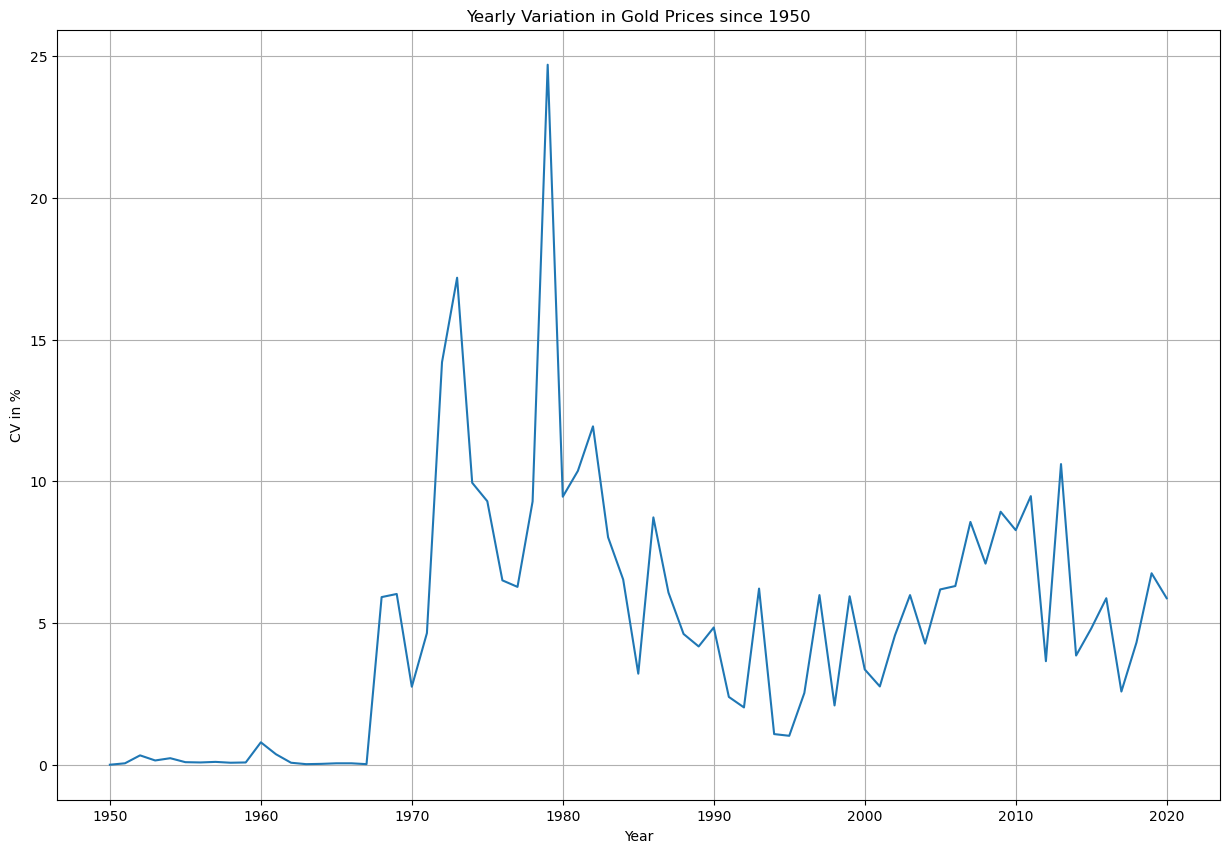

In [14]:
# Create a new figure and axes with the specified size
fig, ax = plt.subplots(figsize=(15,10))

# Plot the 'cov_pct' column of the DataFrame 'df_1'
df_1['cov_pct'].plot()

# Set the title of the plot
plt.title('Yearly Variation in Gold Prices since 1950')

# Set the label for the x-axis
plt.xlabel('Year')

# Set the label for the y-axis
plt.ylabel('CV in %')

# Add a grid to the plot
plt.grid();

----------

### Time Series Forecasting

#### a. Setting Train & Test Data

In [15]:
# Split the data into train and test sets based on the year in the index
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

# Print the shape of the train and test sets
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


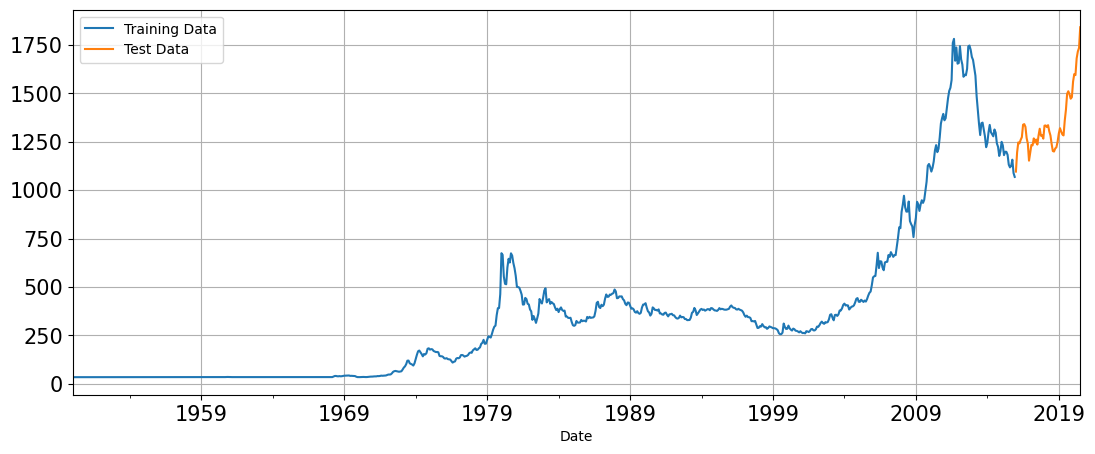

In [16]:
# Plot the "Price" column from the train set
train["Price"].plot(figsize=(13,5), fontsize=15)

# Plot the "Price" column from the test set
test["Price"].plot(figsize=(13,5), fontsize=15)

# Add a grid to the plot
plt.grid()

# Add a legend to the plot with labels for the train and test sets
plt.legend(['Training Data', 'Test Data'])

# Show the plot
plt.show();

#### b. Model Formation

#### Linear Regression Model

In [17]:
# Create a list of time values for the train set
train_time = [i+1 for i in range(len(train))]

# Create a list of time values for the test set
test_time = [i+len(train)+1 for i in range(len(test))]

# Print the length of the train_time and test_time lists
len(train_time), len(test_time)

(792, 55)

In [18]:
# Create copies of the train and test sets
LR_train = train.copy()
LR_test = test.copy()

In [19]:
# Add the time values to the LR_train and LR_test sets
LR_train['time'] = train_time
LR_test['time'] = test_time

In [20]:
# Create an instance of the LinearRegression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(LR_train[['time']],LR_train['Price'].values)


LinearRegression()

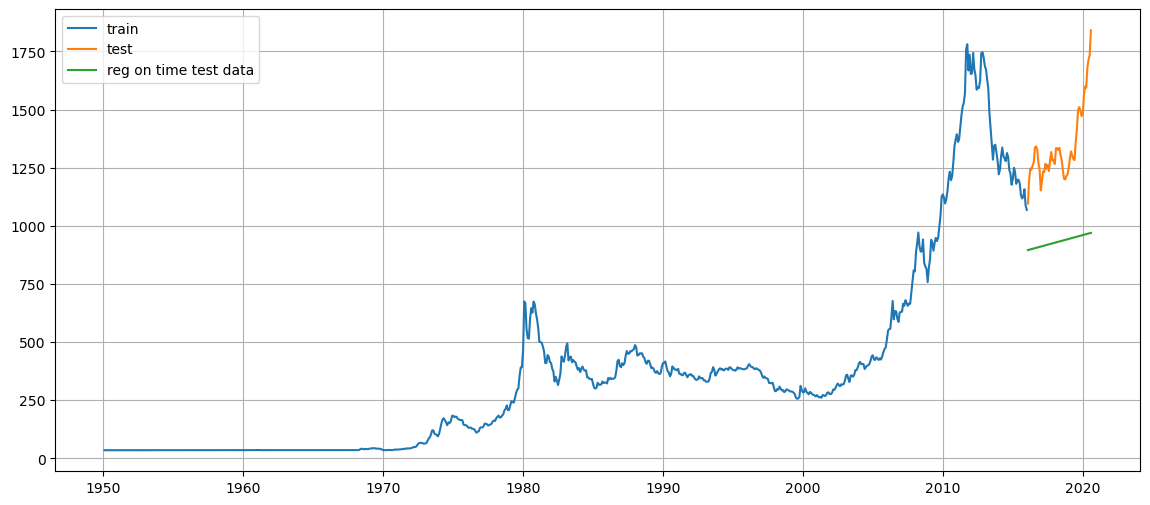

In [21]:
# Use the fitted LinearRegression model to make predictions on the test set
test_predictions_model1 = lr.predict(LR_test[['time']])

# Add the predictions as a new column in the LR_test DataFrame
LR_test['forecast'] = test_predictions_model1

# Create a new figure with a specified size
plt.figure(figsize=(14,6))

# Plot the "Price" column from the train set
plt.plot(train['Price'], label='train')

# Plot the "Price" column from the test set
plt.plot(test['Price'], label='test')

# Plot the "forecast" column from the LR_test set
plt.plot(LR_test['forecast'], label = 'reg on time test data')

# Add a legend to the plot with labels for each series
plt.legend(loc='best')

# Add a grid to the plot
plt.grid();

In [22]:
def mape(actual, pred):
    # Calculate the mean absolute percentage error (MAPE)
    return round ((np.mean(abs(actual-pred)/actual))*100, 2)

In [23]:
# Calculate the MAPE for the test set using the mape function
mape_model1_test = mape(test['Price'].values, test_predictions_model1)

# Print the MAPE for the test set
print("MAPE is %.2f"%(mape_model1_test),"%")

MAPE is 29.76 %


In [24]:
# Create a DataFrame to store the MAPE results for the test set
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test Mape (%)
Regression on Time,29.76


----------------

#### Naive Forecasting Model

In [25]:
# Create copies of the train and test sets
Naive_train = train.copy()
Naive_test = test.copy()

In [26]:
# Add a new column "naive" to the Naive_test DataFrame
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]

# Display the first 5 rows of the "naive" column
Naive_test['naive'].head()

Date
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

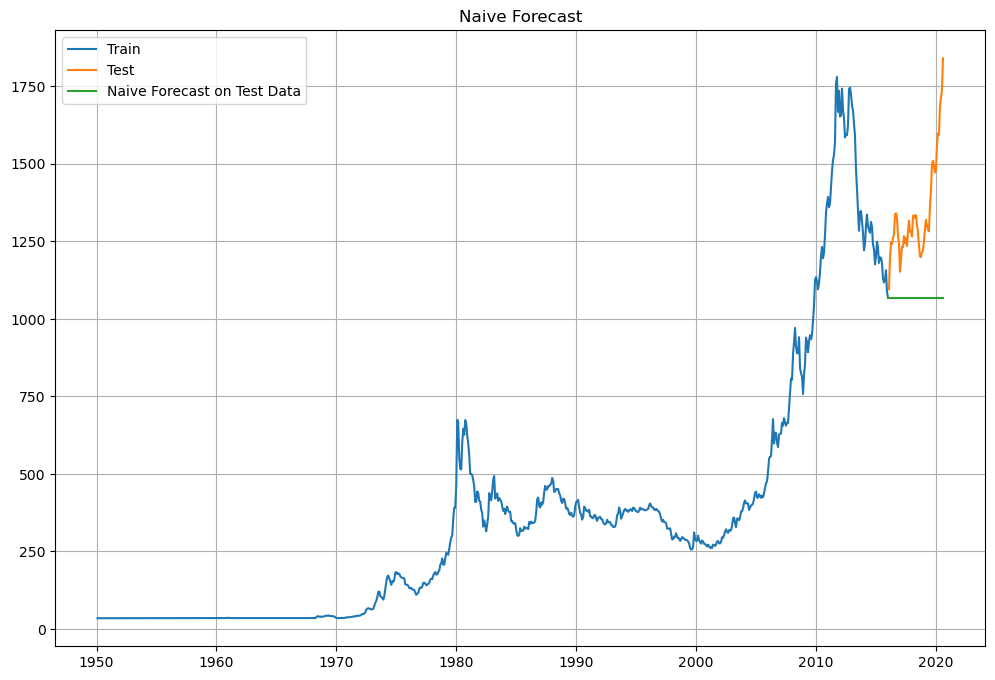

In [27]:
# Create a new figure with a specified size
plt.figure(figsize=(12,8))

# Plot the "Price" column from the Naive_train set
plt.plot(Naive_train['Price'], label='Train')

# Plot the "Price" column from the test set
plt.plot(test['Price'], label='Test')

# Plot the "naive" column from the Naive_test set
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')

# Add a legend to the plot with labels for each series
plt.legend(loc='best')

# Add a title to the plot
plt.title("Naive Forecast")

# Add a grid to the plot
plt.grid();

In [28]:
# Calculate the MAPE for the test set using the mape function
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)

# Print the MAPE for the test set
print("For Naive Forecast on the Test Data, MAPE is %.2f" %(mape_model2_test),"%")

For Naive Forecast on the Test Data, MAPE is 19.38 %


In [29]:
# Create a DataFrame to store the MAPE results for the test set
results2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])

# Concatenate the results and results2 DataFrames
results = pd.concat([results, results2])

# Display the updated results DataFrame
results

,Test Mape (%),Test MAPE (%)
Regression on Time,29.76,NaN
NaiveModel,NaN,19.38


--------------------

#### Exponential Smoothing Model - Final Model

In [30]:
# Create an instance of the ExponentialSmoothing model
final_model = ExponentialSmoothing(df, 
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                             smoothing_trend = 0.3,
                                                             smoothing_seasonal = 0.6)

In [31]:
# Calculate the MAPE for the fitted values using the mape function
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)

# Print the MAPE for the fitted values
print("MAPE:", mape_final_model)

MAPE: 17.24


In [32]:
# Use the fitted ExponentialSmoothing model to make forecasts
predictions = final_model.forecast(steps=len(test))

In [33]:
# Create a DataFrame to store the predictions and confidence intervals
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid, ddof=1),
                       'prediction': predictions,
                       'upper_CI' : predictions + 1.96*np.std(final_model.resid, ddof=1)})

# Display the first 5 rows of the pred_df DataFrame
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


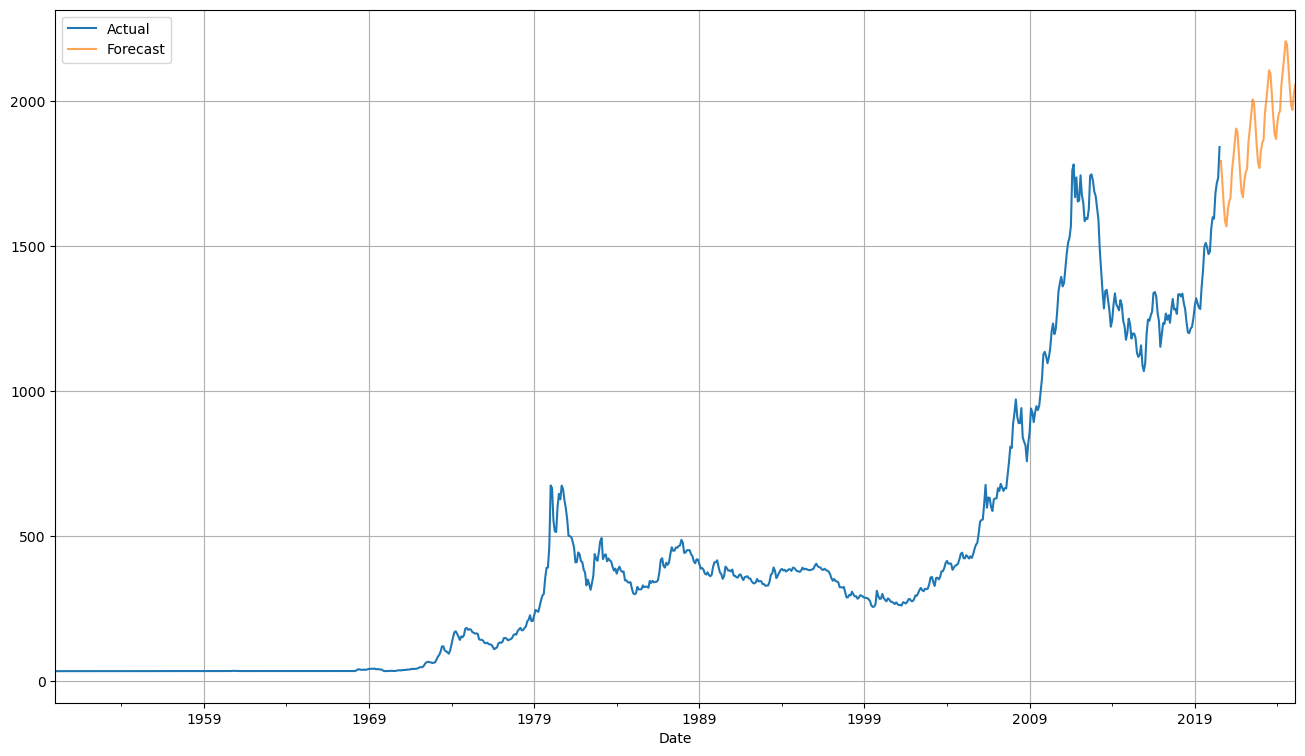

In [34]:
# Create a plot of the actual data from the df DataFrame
axis = df['Price'].plot(figsize=(16,9), label='Actual')

# Add the forecast data from the pred_df DataFrame to the plot
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.7)

# Add a legend to the plot at the best location
plt.legend(loc='best')

# Add a grid to the plot
plt.grid()

------------

### Comparing all 3 models

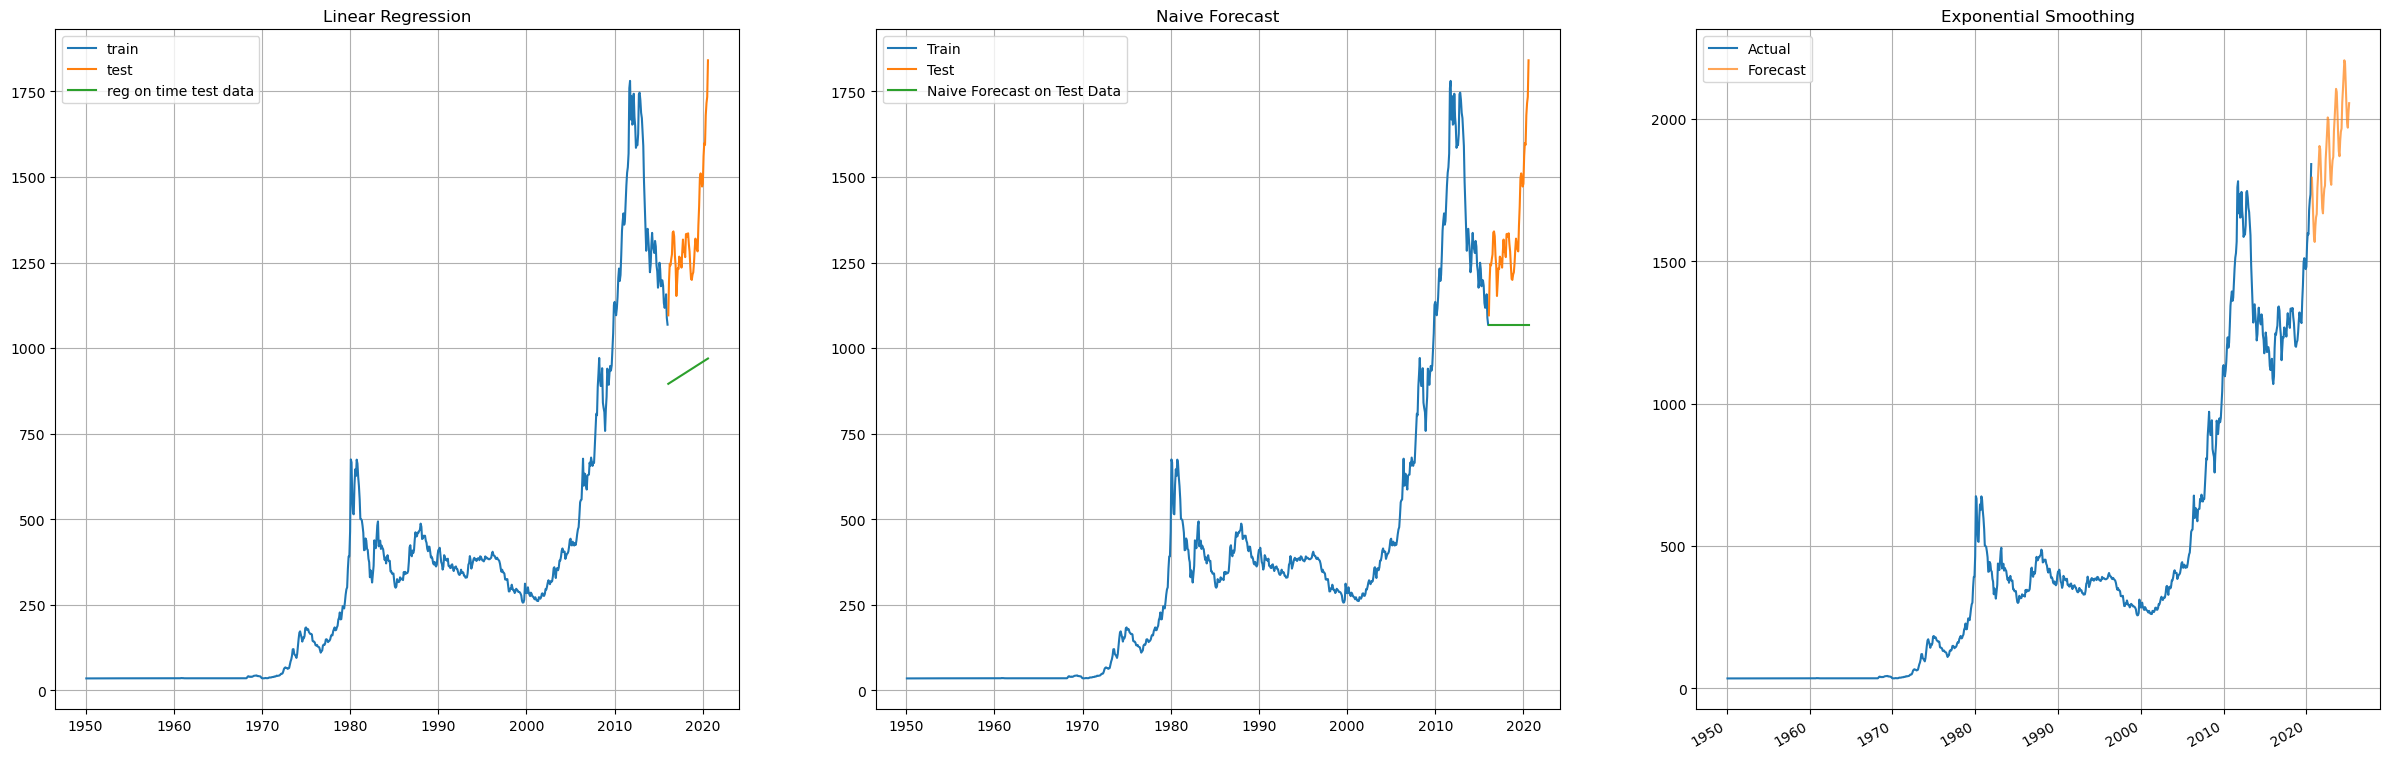

In [36]:
# Create a new figure with a specified size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))

# Linear Regression Model
# Plot the "Price" column from the train set
axes[0].plot(train['Price'], label='train')

# Plot the "Price" column from the test set
axes[0].plot(test['Price'], label='test')

# Plot the "forecast" column from the LR_test set
axes[0].plot(LR_test['forecast'], label = 'reg on time test data')

# Add a legend to the plot with labels for each series
axes[0].legend(loc='best')

# Add a grid to the plot
axes[0].grid()

# Add a title to the plot
axes[0].set_title("Linear Regression")

#-------------------------------------------------------------------------

# Naive's Forecast Model

# Plot the "Price" column from the Naive_train set
axes[1].plot(Naive_train['Price'], label='Train')

# Plot the "Price" column from the test set
axes[1].plot(test['Price'], label='Test')

# Plot the "naive" column from the Naive_test set
axes[1].plot(Naive_test['naive'], label='Naive Forecast on Test Data')

# Add a legend to the plot with labels for each series
axes[1].legend(loc='best')

# Add a title to the plot
axes[1].set_title("Naive Forecast")

# Add a grid to the plot
axes[1].grid()

#-------------------------------------------------------------------------

# Exponential Smoothing Model

# Plot the actual data from the df DataFrame
axes[2].plot(df['Price'], label='Actual')

# Add the forecast data from the pred_df DataFrame to the plot
pred_df['prediction'].plot(ax=axes[2], label='Forecast', alpha=0.7)

# Add a legend to the plot at the best location
axes[2].legend(loc='best')

# Add a title to the plot
axes[2].set_title("Exponential Smoothing")

# Add a grid to the plot
axes[2].grid()